In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
import numpy as np

In [16]:
def parse_moos_bathy(filename):
    moos_bty = open(filename)

    state = 0
    n = 0
    X = []
    Y = []
    Z = []
    
    for line in moos_bty:
        line = line.strip()
        if line.find('iBATHY') > -1:
            state = 1
        elif state == 1:
            state = 2
            [X.append(float(x)) for x in line.split(',')]
        elif state == 2:
            state = 3
            [Y.append(float(x)) for x in line.split(',')]
        elif state == 3:
            state = 0
            [Z.append(float(x)) for x in line.split(',')]
    return np.array([X,Y,Z]).T

In [21]:
teach_points = parse_moos_bathy('20201003_144239_TEACH.bathy.txt')
repeat_points = parse_moos_bathy('20201003_144342_REPEAT.bathy.txt')
lawnmower = parse_moos_bathy('20201003_154832_.bathy.txt')

In [22]:
teach_points.shape

(30480, 3)

<IPython.core.display.Javascript object>


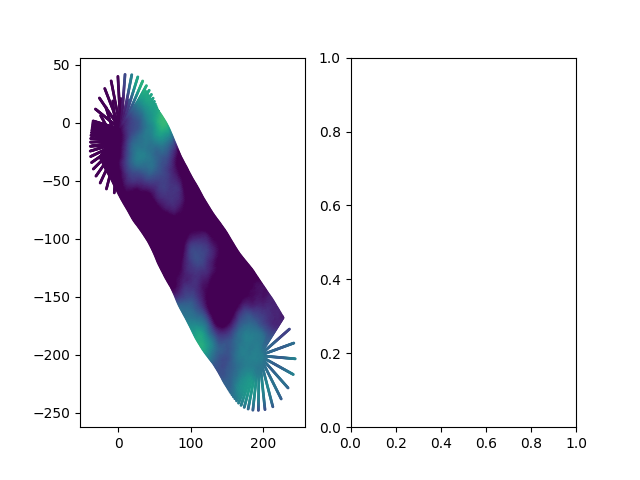

In [20]:
fig,ax = plt.subplots(1,2)
ax[0].scatter(teach_points[:,0],teach_points[:,1],c=teach_points[:,2],s=1,vmin=100,vmax=120)
ax[1].scatter(repeat_points[:,0],repeat_points[:,1],c=repeat_points[:,2],s=1,vmin=100,vmax=120)
#ax.plot(repeat_points[:,0],repeat_points[:,1],'.',markersize=1)

In [8]:
teach_points

array([[  44.63,  -20.  ,  107.59],
       [  43.95,  -20.  ,  107.54],
       [  43.28,  -20.  ,  107.74],
       ...,
       [ 165.81, -228.01,  109.81],
       [ 165.29, -228.53,  109.51],
       [ 164.77, -229.05,  109.47]])